# Introduction to API
<hr>

## Objectives

After completing this exercise you will be able to:

*   Create and use APIs in Python


### Introduction

An API lets two pieces of software talk to each other. Just like a function, you don't have to know how the API works, only its inputs and outputs.  An essential type of API is a REST API that allows you to access resources via the internet. Now we will review the Pandas Library in the context of an API, we will also review a basic REST API.


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#Pandas-is-an-API">Pandas is an API</a></li>
<li><a href="#REST-APIs">REST APIs</a></li>
<li><a href="#Quiz">Quiz</a></li>

</div>

<hr>


## Pandas is an API


Pandas is actually set of software components , much of  which is not even written in Python.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

You create a dictionary, this is just data.


In [2]:
dict_={'a':[11,21,31],'b':[12,22,32]}

When you create a Pandas object with the dataframe constructor, in API lingo this is an "instance". The data in the dictionary is passed along to the pandas API. You then use the dataframe to communicate with the API.


In [3]:
df=pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/pandas_api.png" width="800," align="center" alt="logistic regression block diagram">

When you call the method `head` the dataframe communicates with the API displaying the first few rows of the dataframe.


In [4]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


When you call the method `mean`, the API will calculate the mean and return the value.


In [5]:
df.mean()

a    21.0
b    22.0
dtype: float64

## REST APIs


<p>Rest APIs function by sending a <b>request</b>, the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or <b>resource</b> to perform. In a similar manner, API returns a <b>response</b>, via an HTTP message, this response is usually contained within a JSON.</p>
<p>Now we will use the <a href=https://pypi.org/project/nba-api/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01>NBA API</a> to determine how well the Golden State Warriors performed against the Toronto Raptors. We will use the API to determine the number of points the Golden State Warriors won or lost by for each game. So if the value is three, the Golden State Warriors won by three points. Similarly if the  Golden State Warriors lost  by two points the result will be negative two. The API will handle a lot of the details, such a Endpoints and Authentication. </p>


It's quite simple to use the nba api to make a request for a specific team. We don't require a JSON, all we require is an id. This information is stored locally in the API. We import the module `teams`.


In [6]:
# !pip install nba_api

In [7]:
from nba_api.stats.static import teams
import matplotlib.pyplot as plt

In [8]:
# This function will convert the Lists of dictionaries into a single dictionary
def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict

The method <code>get_teams()</code> returns a list of dictionaries.


In [9]:
nba_teams = teams.get_teams()
nba_teams

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970},
 {'id': 1610612740,
  'full_name': 'New Orleans Pelicans',
  'abbreviation': 'NOP',
  'nickname': 'Pelicans',
  'city': 'New Orleans',
  'state': 'Louisiana',
  'year_founded': 2002},
 {'id': 1610612741,
  'full_name': 'Chicago Bulls',
  'abbreviation': 'CHI',
  'nickname': 'Bulls',
  'city': 'Chicago',
  'state': 'Illinois',
  'year_founded': 1966},
 {'id': 1610612742,
  'full_name': 'Dallas Mavericks',
  'abbreviation': 'DAL',
  'nickname': 'Mavericks',
  'city': 'Dallas',

The dictionary key id has a unique identifier for each team as a value. Let's look at the first three elements of the list:


In [10]:
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

To make things easier, we can convert the dictionary to a table. First, we use the function <code>one dict</code>, to create a dictionary. We use the common keys for each team as the keys, the value is a list; each element of the list corresponds to the values for each team.
We then convert the dictionary to a dataframe, each row contains the information for a different team.


In [11]:
dict_nba_team=one_dict(nba_teams)
df_teams=pd.DataFrame(dict_nba_team)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


Will use the team's nickname to find the unique id, we can see the row that contains the warriors by using the column nickname as follows:


In [12]:
df_warriors=df_teams[df_teams['nickname']=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


We can use the following line of code to access the first column of the DataFrame:


In [13]:
id_warriors=df_warriors[['id']].values[0][0]
# we now have an integer that can be used to request the Warriors information 
id_warriors

np.int64(1610612744)

The function "League Game Finder " will make an API call, it's in the module <code>stats.endpoints</code>.


In [14]:
from nba_api.stats.endpoints import leaguegamefinder

The parameter <code>team_id_nullable</code> is the unique ID for the warriors. Under the hood, the NBA API is making a HTTP request.\
The information requested is provided and is transmitted via an HTTP response this is assigned to the object <code>game finder</code>.


In [15]:
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)

In [16]:
gamefinder

We can see the json file by running the following line of code.


In [17]:
gamefinder.get_json()

'{"resource": "leaguegamefinderparameters", "parameters": {"PlayerOrTeam": "T", "LeagueID": null, "Season": null, "SeasonType": null, "DateFrom": null, "DateTo": null, "TeamID": "1610612744", "VsTeamID": null, "PlayerID": null, "GameID": null, "Outcome": null, "Location": null, "VsConference": null, "VsDivision": null, "Conference": null, "Division": null, "DraftYear": null, "DraftNumber": null, "DraftRound": null, "DraftTeam": "", "RookieYear": null, "YearsExperience": null, "SeasonSegment": null, "PORound": null, "StarterBench": null, "GtPts": null, "GtReb": null, "GtAst": null, "GtStl": null, "GtBlk": null, "GtOreb": null, "GtDreb": null, "GtDd": null, "GtTd": null, "GtMinutes": null, "GtTov": null, "GtPf": null, "GtFgm": null, "GtFga": null, "GtFgPct": null, "GtFtm": null, "GtFta": null, "GtFtPct": null, "GtFg3m": null, "GtFg3a": null, "GtFg3Pct": null, "LtPts": null, "LtReb": null, "LtAst": null, "LtStl": null, "LtBlk": null, "LtOreb": null, "LtDreb": null, "LtDd": null, "LtTd": n

The game finder object has a method <code>get_data_frames()</code>, that returns a dataframe.  If we view the dataframe, we can see it contains information about all the games the Warriors played.  The <code>PLUS_MINUS</code> column contains information on the score, if the value is negative, the Warriors lost by that many points, if the value is positive, the warriors won by that amount of points. The column <code>MATCHUP</code> has the team the Warriors were playing, GSW stands for Golden State Warriors and TOR means Toronto Raptors. <code>vs</code> signifies it was a home game and the <code>@ </code>symbol means an away game.


In [18]:
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,12025,1610612744,GSW,Golden State Warriors,0012500030,2025-10-05,GSW vs. LAL,W,241,111,...,0.762,8.0,36.0,44.0,35,11,7,18,24,8.0
1,22025,1610612744,GSW,Golden State Warriors,1522500071,2025-07-19,GSW vs. CLE,W,201,82,...,0.625,14.0,27.0,41.0,17,14,6,20,23,11.0
2,22025,1610612744,GSW,Golden State Warriors,1522500059,2025-07-17,GSW @ TOR,L,201,69,...,0.655,17.0,31.0,48.0,14,8,4,27,29,-12.0
3,22025,1610612744,GSW,Golden State Warriors,1522500045,2025-07-15,GSW @ MEM,W,200,96,...,0.652,12.0,24.0,36.0,21,8,6,18,19,12.0
4,22025,1610612744,GSW,Golden State Warriors,1522500031,2025-07-13,GSW @ UTA,W,200,103,...,0.844,14.0,33.0,47.0,18,9,5,17,20,10.0


You can download the dataframe from the API call for Golden State and run the rest like a video.


In [19]:
import requests

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl"

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

download(filename, "Asset_Files/Module_5_API_Golden_State.pkl")


In [20]:
file_name = "Asset_Files/Module_5_API_Golden_State.pkl"
games = pd.read_pickle(file_name)
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10.0,3,11.0,21,3.2
1,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11.0,7,20.0,20,-8.0
2,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10.0,4,13.0,22,8.0
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
4,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9.0,3,13.0,15,-8.0


We can create two dataframes, one for the games that the Warriors faced the raptors at home, and the second for away games.


In [21]:
games_home=games[games['MATCHUP']=='GSW vs. TOR']
games_away=games[games['MATCHUP']=='GSW @ TOR']

We can calculate the mean for the column <code>PLUS_MINUS</code> for the dataframes <code>games_home</code> and <code> games_away</code>:


In [22]:
games_home

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
8,42018,1610612744,GSW,Golden State Warriors,0041800406,2019-06-13,GSW vs. TOR,L,240,110,...,0.700,11.0,31.0,42.0,28,9.0,6,16.0,23,-4.0
10,42018,1610612744,GSW,Golden State Warriors,0041800404,2019-06-07,GSW vs. TOR,L,241,92,...,0.667,8.0,34.0,42.0,26,6.0,6,17.0,23,-13.0
11,42018,1610612744,GSW,Golden State Warriors,0041800403,2019-06-05,GSW vs. TOR,L,241,109,...,0.833,13.0,28.0,41.0,25,8.0,3,14.0,21,-14.0
83,22018,1610612744,GSW,Golden State Warriors,0021800415,2018-12-12,GSW vs. TOR,L,239,93,...,0.692,5.0,35.0,40.0,28,5.0,11,19.0,18,-20.0
223,22017,1610612744,GSW,Golden State Warriors,0021700063,2017-10-25,GSW vs. TOR,W,241,117,...,0.864,6.0,31.0,37.0,32,10.0,7,17.0,15,5.0
304,22016,1610612744,GSW,Golden State Warriors,0021600485,2016-12-28,GSW vs. TOR,W,240,121,...,0.833,9.0,42.0,51.0,33,4.0,9,20.0,16,10.0
444,22015,1610612744,GSW,Golden State Warriors,0021500164,2015-11-17,GSW vs. TOR,W,239,115,...,0.667,9.0,25.0,34.0,31,10.0,6,20.0,29,5.0
462,12015,1610612744,GSW,Golden State Warriors,0011500009,2015-10-05,GSW vs. TOR,W,240,95,...,0.750,4.0,33.0,37.0,29,8.0,7,17.0,22,8.0
541,22014,1610612744,GSW,Golden State Warriors,0021400493,2015-01-02,GSW vs. TOR,W,240,126,...,0.800,14.0,31.0,45.0,35,8.0,8,9.0,18,21.0


In [23]:
games_away

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
9,42018,1610612744,GSW,Golden State Warriors,0041800405,2019-06-10,GSW @ TOR,W,240,106,...,0.714,6.0,31.0,37.0,27,5.0,7,15.0,22,1.0
12,42018,1610612744,GSW,Golden State Warriors,0041800402,2019-06-02,GSW @ TOR,W,240,109,...,0.870,6.0,36.0,42.0,34,7.0,5,15.0,26,5.0
13,42018,1610612744,GSW,Golden State Warriors,0041800401,2019-05-30,GSW @ TOR,L,239,109,...,0.935,9.0,29.0,38.0,29,6.0,2,16.0,27,-9.0
89,22018,1610612744,GSW,Golden State Warriors,0021800316,2018-11-29,GSW @ TOR,L,265,128,...,0.850,17.0,29.0,46.0,27,6.0,5,14.0,22,-3.0
184,22017,1610612744,GSW,Golden State Warriors,0021700631,2018-01-13,GSW @ TOR,W,239,127,...,0.857,3.0,27.0,30.0,28,4.0,3,6.0,20,2.0
326,22016,1610612744,GSW,Golden State Warriors,0021600165,2016-11-16,GSW @ TOR,W,240,127,...,0.929,7.0,28.0,35.0,33,9.0,7,12.0,25,6.0
343,12016,1610612744,GSW,Golden State Warriors,0011600001,2016-10-01,GSW @ TOR,L,241,93,...,0.625,9.0,33.0,42.0,19,15.0,7,21.0,24,-4.0
345,22016,1610612744,GSW,Golden State Warriors,1521600051,2016-07-14,GSW @ TOR,L,198,69,...,0.750,14.0,29.0,43.0,16,9.0,3,17.0,25,-6.0
435,22015,1610612744,GSW,Golden State Warriors,0021500290,2015-12-05,GSW @ TOR,W,239,112,...,0.722,8.0,35.0,43.0,22,2.0,5,12.0,24,3.0
516,22014,1610612744,GSW,Golden State Warriors,0021400861,2015-02-27,GSW @ TOR,W,240,113,...,0.842,9.0,38.0,47.0,31,11.0,5,12.0,22,24.0


In [24]:
games_home['PLUS_MINUS'].mean()

np.float64(3.730769230769231)

In [25]:
games_away['PLUS_MINUS'].mean()

np.float64(-0.6071428571428571)

We can plot out the <code>PLUS MINUS</code> column for the dataframes <code>games_home</code> and <code> games_away</code>.
We see the warriors played better at home.


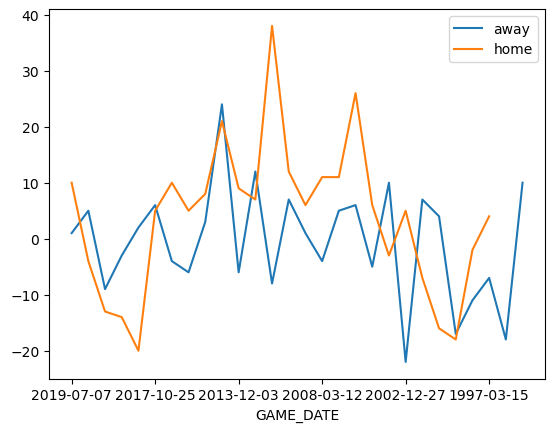

In [26]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

## Exercise


Calculate the mean for the column <code>PTS</code> for the dataframes <code>games_home</code> and <code> games_away</code>:


In [27]:
games_home["PTS"].mean()

np.float64(106.8076923076923)

In [28]:
games_away["PTS"].mean()

np.float64(102.96428571428571)

<h1> HTTP and Requests</h1>
<hr>

## Objectives

After completing this lab you will be able to:

*   Understand HTTP
*   Handle HTTP Requests


<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>
            <a href="#Overview-of-HTTP">Overview of HTTP </a>
            <ul>
                <li><a href="#Uniform-Resource-Locator:URL">Uniform Resource Locator:URL</a></li>
                 <li><a href="#Request">Request</a></li>
                <li><a href="#Response">Response</a></li>
            </ul>
        </li>
        <li>
            <a href="#Requests-in-Python">Requests in Python  </a>
            <ul>
                <li><a href="#Get-Request-with-URL-Parameters">Get Request with URL Parameters</a></li>
                <li><a href="#Post-Requests">Post Requests </a></li>

</ul>

</div>


## Overview of HTTP


When you, the **client**, access a web page your browser sends an **HTTP** request to the **web server** that hosts the page. If no specific file is mentioned in the URL, the server typically looks for a default file, such as "<code>index.html</code>". If your request is successful, the server will send the object to the client in an **HTTP response**. This includes information like the type of the **resource**, the length of the **resource**, and other information.

<p>
The <b>HTTP</b> protocol allows you to send and receive information through the web including webpages, images, and other web resources. In this practice exercise, we will perform some experiments on the Requests library for interacting with the <code>HTTP</code> protocol. 
</p


## Uniform Resource Locator:URL


Uniform resource locator (URL) is the most popular way to find resources on the web.  We can break the URL into three parts.

<ul>
    <li><b>Scheme</b>:- This is this protocol, for this lab it will always be <code>http://</code>  </li>
    <li><b> Internet address or  Base URL </b>:- This will be used to find the location here are some examples: <code>www.ibm.com</code> and  <code> www.gitlab.com </code> </li>
    <li><b>Route</b>:- Location on the web server for example: <code>/images/IDSNlogo.png</code> </li>
</ul>


You may also hear the term Uniform Resource Identifier (URI), URL are actually a subset of URIs. Another popular term is endpoint, this is the URL of an operation provided by a Web server.


## Request


The process can be broken into the <b>Request</b> and <b>Response </b> process.  The request using the get method is partially illustrated below. In the start line we have the <code>GET</code> method, this is an <code>HTTP</code> method. Also the location of the resource  <code>/index.html</code> and the <code>HTTP</code> version. The Request header passes additional information with an <code>HTTP</code> request:


When an <code>HTTP</code> request is made, an <code>HTTP</code> method is sent, this tells the server what action to perform.


## Response


The response start line contains the version number <code>HTTP/1.0</code>, a status code (200) meaning success, followed by a descriptive phrase (OK). The response header contains useful information. Finally, we have the response body containing the requested file, an <code> HTML </code> document.  It should be noted that some requests have headers.


Some status code examples are shown in the table below, the prefix indicates the class.  Check out the following <a href="https://developer.mozilla.org/en-US/docs/Web/HTTP/Status?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01">link </a> for more descriptions.


## Requests in Python


Requests is a Python Library that allows you to send <code>HTTP/1.1</code> requests easily. We can import the library as follows:


In [29]:
import requests

We will also use the following libraries:


In [30]:
import os 
from PIL import Image
from IPython.display import IFrame

You can make a <code>GET</code> request via the method <code>get</code> to [www.ibm.com](http://www.ibm.com/?utm_source=Exinfluencer&utm_content=000026UJ&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01&utm_medium=Exinfluencer&utm_term=10006555):


In [31]:
url='https://www.ibm.com/'
r=requests.get(url)


We have the response object <code>r</code>, this has information about the request, like the status of the request. We can view the status code using the attribute <code>status_code</code>.


In [32]:
r.status_code

200

You can view the request headers:


In [33]:
print(r.request.headers)

{'User-Agent': 'python-requests/2.32.4', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive', 'Cookie': '_abck=4EEF69CAAAF4121AC8E5B8410489E867~-1~YAAQnSE1F3OgTJ+ZAQAAccILuQ6CnzasaewDhJJFfSrB9Bw6HLmIY+NkMss+ITRyGgRKtBDKRS7ilQtNlZ7AMMNOaqXsPSV0+svUy8RGaPR9sEz2V5vU/xXjMYfkjpAAQuSVtt+JUigQEZL/+Brgh0eBVWqBC6yDjouHgqgQ3gpTw9G0LBO2sU68S5XhLNedRLaR7DqT5rLXk3heW1g9npGnOVm8tTncxd4yjmxoc98x8fsn9X2lnj1JzMMQo794W3CjxgBkYrLKjLGJqozTYqLbCFl4EFYV+eU7mNYGYolfX6zxn+8rnaEZmx2pbiJo2dAaFQAsGsFwzyq4/DX1gwzbodVyBIiw6fl7hfxL1rAMZjqFx4nzPTpcMjBWWUQDqD55pjjNJR2ZJ+6sE2mtqiXDhp6vNJoi2cGcUCp+QghdhcMOSjFAmMgxW0CcxYDMLsU=~-1~-1~-1~-1~-1; bm_sz=9FD1B4BAB78FC05487342B2CF86261E3~YAAQnSE1F3SgTJ+ZAQAAccILuR2Rs2e0/MnXkc8ib83IA8pbdF675ohngb9wkcpinpHpCdb47MMuT+9F2ILMDq/Er21vo4asjkao+SArunSPUuv1jMdB/Jeyrm13Qfu8DvSPXd8Uiwo5Y4bFQxnsYGHg34hkf8cHPFhS5Rg7RVKz/8oQyMN+pb4krQNMWMXR6fCqkPto13y2Vfn82G27MMrALDjFWvtB55mgbq6+eXcoUO6VJlHJKNDbCZKohH8+YKshT+Qvx0qcQywHCpF+P8DqWlPAr/Y9dP6j+bdpxUwuRQloD9UQ83VaB

You can view the request body, in the following line, as there is no body for a get request we get a <code>None</code>:


In [34]:
print("request body:", r.request.body)

request body: None


You can view the <code>HTTP</code> response header using the attribute <code>headers</code>. This returns a python dictionary of <code>HTTP</code> response headers.


In [35]:
header=r.headers
print(r.headers)

{'Content-Security-Policy': 'upgrade-insecure-requests', 'x-frame-options': 'SAMEORIGIN', 'Last-Modified': 'Mon, 06 Oct 2025 10:05:57 GMT', 'ETag': '"2cee1-6407a98ffc36e-gzip"', 'Accept-Ranges': 'bytes', 'Content-Type': 'text/html;charset=utf-8', 'X-Content-Type-Options': 'nosniff', 'Cache-Control': 'max-age=600', 'Expires': 'Mon, 06 Oct 2025 10:33:00 GMT', 'X-Akamai-Transformed': '0 - 0 -', 'Content-Encoding': 'gzip', 'Date': 'Mon, 06 Oct 2025 10:23:00 GMT', 'Content-Length': '36953', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Strict-Transport-Security': 'max-age=31536000'}


We can obtain the date the request was sent using the key <code>Date</code>.


In [36]:
header['Date']

'Mon, 06 Oct 2025 10:23:00 GMT'

<code>Content-Type</code> indicates the type of data:


In [37]:
header['Content-Type']

'text/html;charset=utf-8'

You can also check the <code>encoding</code>:


In [38]:
 r.encoding

'utf-8'

As the <code>Content-Type</code> is <code>text/html</code> we can use the attribute <code>text</code> to display the <code>HTML</code> in the body. We can review the first 100 characters:


In [39]:
r.text[0:100]

'\n<!DOCTYPE HTML>\n<html lang="en">\n<head>\r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n      \r\n    \r\n  '

You can load other types of data for non-text requests, like images. Consider the URL of the following image:


In [40]:
# Use single quotation marks for defining string
url = 'https://raw.githubusercontent.com/KashifMaqbool/git_demo/refs/heads/main/Profile.png'

We can make a get request:


In [41]:
r=requests.get(url)

We can look at the response header:


In [42]:
print(r.headers)

{'Connection': 'keep-alive', 'Content-Length': '1053172', 'Cache-Control': 'max-age=300', 'Content-Security-Policy': "default-src 'none'; style-src 'unsafe-inline'; sandbox", 'Content-Type': 'image/png', 'ETag': 'W/"c4a18073ab80fa345185bb77d5391c6771ba55320d0a70bf062a83da2d8787fa"', 'Strict-Transport-Security': 'max-age=31536000', 'X-Content-Type-Options': 'nosniff', 'X-Frame-Options': 'deny', 'X-XSS-Protection': '1; mode=block', 'X-GitHub-Request-Id': 'DEB6:2EAC6D:B8C169:D9169E:68E39884', 'Accept-Ranges': 'bytes', 'Date': 'Mon, 06 Oct 2025 10:23:01 GMT', 'Via': '1.1 varnish', 'X-Served-By': 'cache-mrs10523-MRS', 'X-Cache': 'MISS', 'X-Cache-Hits': '0', 'X-Timer': 'S1759746182.539718,VS0,VE213', 'Vary': 'Authorization,Accept-Encoding', 'Access-Control-Allow-Origin': '*', 'Cross-Origin-Resource-Policy': 'cross-origin', 'X-Fastly-Request-ID': '9e3638d3c8231827c31000a5b30c49421e35d873', 'Expires': 'Mon, 06 Oct 2025 10:28:01 GMT', 'Source-Age': '0'}


We can see the <code>'Content-Type'</code>


In [43]:
r.headers['Content-Type']

'image/png'

An image is a response object that contains the image as a <a href="https://docs.python.org/3/glossary.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01#term-bytes-like-object">bytes-like object</a>. As a result, we must save it using a file object. First, we specify the <u>file path and
name</u>


In [44]:
path=os.path.join(os.getcwd(),'Asset_Files/Module_5_Image.png')

We save the file, in order to access the body of the response we use the attribute <code>content</code> then save it using the <code>open</code> function and write <code>method</code>:


In [45]:
with open(path,'wb') as f:
    f.write(r.content)

We can view the image:


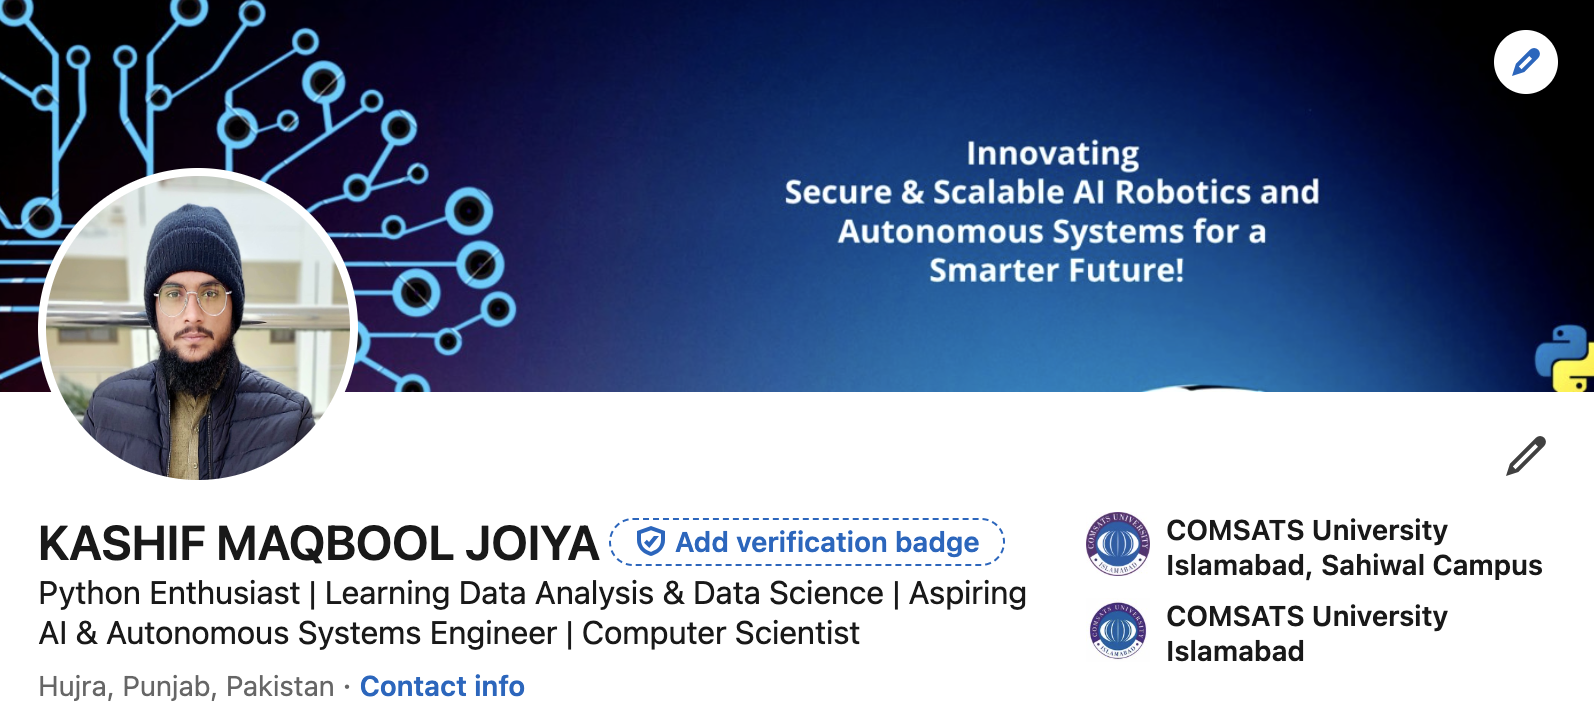

In [46]:
Image.open(path)

<h3>Practice Question: Download a file </h3>


Consider the following URL.


Write the commands to download the txt file in the given link.


In [47]:
url = 'https://raw.githubusercontent.com/KashifMaqbool/git_demo/refs/heads/main/example1.txt'

In [48]:
url = 'https://raw.githubusercontent.com/KashifMaqbool/git_demo/refs/heads/main/example1.txt'
path = os.path.join(os.getcwd(), "Asset_Files/Module_5_Example1.txt")
r = requests.get(url)
with open(path, 'wb') as f:
    f.write(r.content)

In [49]:
print(r.content)

b'Kashif Maqbool Joiya:\n\tI am a Computer Scientist, graduated from COMSATS University Islamabad with a strong passion for Python development and Artificial Intelligence. My career journey is structured to develop expertise in data, Python backend development, cloud computing, and AI, ensuring a well-rounded skill set for building intelligent and scalable solutions.\n'


## Get Request with URL Parameters


You can use the <b>GET</b> method to modify the results of your query, for example retrieving data from an API. We send a <b>GET</b> request to the  server. Like before we have the <b>Base URL</b>, in the <b>Route</b> we append <code>/get</code>, this indicates we would like to preform a <code>GET</code> request. 


The Base URL is for <code>[http://httpbin.org/](http://httpbin.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01)</code> is a simple HTTP Request & Response Service. The <code>URL</code> in Python is given by:


In [50]:
url_get='http://httpbin.org/get'

A <a href="https://en.wikipedia.org/wiki/Query_string?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01">query string</a> is a part of a uniform resource locator (URL), this sends other information to the web server. The start of the query is a <code>?</code>, followed by a series of parameter and value pairs, as shown in the table below. The first parameter name is <code>name</code> and the value is <code>Joseph</code>. The second parameter name is <code>ID</code> and the Value is <code>123</code>. Each pair, parameter, and value is separated by an equals sign, <code>=</code>.
The series of pairs is separated by the ampersand <code>&</code>.


To create a Query string, add a dictionary. The keys are the parameter names and the values are the value of the Query string.


In [51]:
payload={"name":"Joseph","ID":"123"}

Then passing the dictionary <code>payload</code> to the <code>params</code> parameter of the <code> get()</code> function:


In [52]:
r=requests.get(url_get,params=payload)

We can print out the <code>URL</code> and see the name and values.


In [53]:
r.url

'http://httpbin.org/get?name=Joseph&ID=123'

There is no request body.


In [54]:
print("request body:", r.request.body)

request body: None


We can print out the status code.


In [55]:
print(r.status_code)

200


We can view the response as text:


In [56]:
print(r.text)

{
  "args": {
    "ID": "123", 
    "name": "Joseph"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate, br", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.32.4", 
    "X-Amzn-Trace-Id": "Root=1-68e39887-798fd0864e2767ee497b2e0a"
  }, 
  "origin": "101.53.234.66", 
  "url": "http://httpbin.org/get?name=Joseph&ID=123"
}



We can look at the <code>'Content-Type'</code>.


In [57]:
r.headers['Content-Type']

'application/json'

As the content <code>'Content-Type'</code> is in the <code>JSON</code> format we can use the method <code>json()</code>, it returns a Python <code>dict</code>:


In [58]:
r.json()

{'args': {'ID': '123', 'name': 'Joseph'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, br',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.32.4',
  'X-Amzn-Trace-Id': 'Root=1-68e39887-798fd0864e2767ee497b2e0a'},
 'origin': '101.53.234.66',
 'url': 'http://httpbin.org/get?name=Joseph&ID=123'}

The key <code>args</code> has the name and values:


In [59]:
r.json()['args']

{'ID': '123', 'name': 'Joseph'}

## Post Requests


Like a <code>GET</code> request, a <code>POST</code> is used to send data to a server, but the <code>POST</code> request sends the data in a request body. In order to send the Post Request in Python, in the <code>URL</code> we change the route to <code>POST</code>:


In [60]:
url_post='http://httpbin.org/post'

This endpoint will expect data as a file or as a form. A form is convenient way to configure an HTTP request to send data to a server.


To make a <code>POST</code> request we use the <code>post()</code> function, the variable <code>payload</code> is passed to the parameter <code> data </code>:


In [61]:
r_post=requests.post(url_post,data=payload)

Comparing the URL from the response object of the <code>GET</code> and <code>POST</code> request we see the <code>POST</code> request has no name or value pairs.


In [62]:
#print("POST request URL:",response.url )
print("GET request URL:",r.url)
print("POST request URL:", r_post.url)  # Use r_post instead of response

GET request URL: http://httpbin.org/get?name=Joseph&ID=123
POST request URL: http://httpbin.org/post


We can compare the <code>POST</code> and <code>GET</code> request body, we see only the <code>POST</code> request has a body:


In [63]:
print("GET request body:",r.request.body)
print("POST request body:",r_post.request.body)

GET request body: None
POST request body: name=Joseph&ID=123


We can view the form as well:


In [64]:
r_post.json()['form']

{'ID': '123', 'name': 'Joseph'}

There is a lot more you can do. Check out <a href="https://requests.readthedocs.io/en/master/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01">Requests </a> for more.


In [65]:
r.json()['args']

{'ID': '123', 'name': 'Joseph'}

# Practice: API Examples
<hr>

## Random User and Fruityvice API Examples

## Objectives

After completing this lab you will be able to:

*   Load and use RandomUser API, using `RandomUser()` Python library
*   Load and use Fruityvice API, using `requests` Python library
*   Load and use Open-Joke-API, using `requests` Python library



The purpose of this notebook is to provide more examples on how to use simple APIs. As you have already learned from previous videos and notebooks, API stands for Application Programming Interface and is a software intermediary that allows two applications to talk to each other. 

The advantages of using APIs:
 *   **Automation**. Less human effort is required and workflows can be easily updated to become faster and more      
     productive.
 *   **Efficiency**. It allows to use the capabilities of one of the already developed APIs than to try to 
     independently implement some functionality from scratch.
 
The disadvantage of using APIs:
 *   **Security**. If the API is poorly integrated, it means it will be vulnerable to attacks, resulting in data breeches or losses having financial or reputation implications.

One of the applications we will use in this notebook is Random User Generator. RandomUser is an open-source, free API providing developers with randomly generated users to be used as placeholders for testing purposes. This makes the tool similar to Lorem Ipsum, but is a placeholder for people instead of text. The API can return multiple results, as well as specify generated user details such as gender, email, image, username, address, title, first and last name, and more. More information on [RandomUser](https://randomuser.me/documentation#intro) can be found here.

Another example of simple API we will use in this notebook is Fruityvice application. The Fruityvice API web service which provides data for all kinds of fruit! You can use Fruityvice to find out interesting information about fruit and educate yourself. The web service is completely free to use and contribute to.


## Example 1: RandomUser API
Bellow are Get Methods parameters that we can generate. For more information on the parameters, please visit this [documentation](https://randomuser.me/documentation) page.


## **Get Methods**

- get_cell()
- get_city()
- get_dob()
- get_email()
- get_first_name()
- get_full_name()
- get_gender()
- get_id()
- get_id_number()
- get_id_type()
- get_info()
- get_last_name()
- get_login_md5()
- get_login_salt()
- get_login_sha1()
- get_login_sha256()
- get_nat()
- get_password()
- get_phone()
- get_picture()
- get_postcode()
- get_registered()
- get_state()
- get_street()
- get_username()
- get_zipcode()


To start using the API you can install the `randomuser` library running the `pip install` command.


In [66]:
# !pip install randomuser
# !pip install pandas

Then, we will load the necessary libraries.


In [67]:
from randomuser import RandomUser
import pandas as pd

First, we will create a random user object, r.


In [68]:
r = RandomUser()

Then, using `generate_users()` function, we get a list of random 10 users.


In [69]:
user_list = r.generate_users(10)

In [70]:
user_list

The **"Get Methods"** functions mentioned at the beginning of this notebook, can generate the required parameters to construct a dataset. For example, to get full name, we call `get_full_name()` function.


In [71]:
name = r.get_full_name()
name

'Abigail Fortin'

Let's say we only need 10 users with full names and their email addresses. We can write a "for-loop" to print these 10 users.


In [72]:
for user in user_list:
    print (user.get_full_name()," ",user.get_email())

Owen Jean-Baptiste   owen.jean-baptiste@example.com
Rebecca Gilbert   rebecca.gilbert@example.com
Lance Moore   lance.moore@example.com
Toni Kötter   toni.kotter@example.com
Indah Nieman   indah.nieman@example.com
Zora Lopes   zora.lopes@example.com
John Esteban   john.esteban@example.com
Amaury Colin   amaury.colin@example.com
Gabrielle Williams   gabrielle.williams@example.com
Sylvia Pearson   sylvia.pearson@example.com


## Exercise 1
In this Exercise, generate photos of the random 10 users.


In [73]:
## Write your code here
for user in user_list:
    print(user.get_full_name(), " ",user.get_picture())

Owen Jean-Baptiste   https://randomuser.me/api/portraits/men/27.jpg
Rebecca Gilbert   https://randomuser.me/api/portraits/women/21.jpg
Lance Moore   https://randomuser.me/api/portraits/men/61.jpg
Toni Kötter   https://randomuser.me/api/portraits/men/95.jpg
Indah Nieman   https://randomuser.me/api/portraits/women/87.jpg
Zora Lopes   https://randomuser.me/api/portraits/women/83.jpg
John Esteban   https://randomuser.me/api/portraits/men/26.jpg
Amaury Colin   https://randomuser.me/api/portraits/men/83.jpg
Gabrielle Williams   https://randomuser.me/api/portraits/women/21.jpg
Sylvia Pearson   https://randomuser.me/api/portraits/women/8.jpg


To generate a table with information about the users, we can write a function containing all desirable parameters. For example, name, gender, city, etc. The parameters will depend on the requirements of the test to be performed. We call the Get Methods, listed at the beginning of this notebook. Then, we return pandas dataframe with the users.


In [74]:
def get_users():
    users =[]
    for user in RandomUser.generate_users(10):
        users.append({"Name":user.get_full_name(),"Gender":user.get_gender(),"City":user.get_city(),"State":user.get_state(),"Email":user.get_email(), "DOB":user.get_dob(),"Picture":user.get_picture()})
      
    return pd.DataFrame(users)     

In [75]:
get_users()

,Name,Gender,City,State,Email,DOB,Picture
0,Dorian Lambert,male,Tours,Pyrénées-Orientales,dorian.lambert@example.com,1948-08-04T08:28:47.770Z,https://randomuser.me/api/portraits/men/49.jpg
1,Esperanza Bravo,female,Orihuela,Islas Baleares,esperanza.bravo@example.com,1954-04-14T10:20:11.047Z,https://randomuser.me/api/portraits/women/48.jpg
2,Emilie Park,female,Chelsea,Alberta,emilie.park@example.com,1998-08-26T02:35:42.151Z,https://randomuser.me/api/portraits/women/21.jpg
3,Nick Harper,male,Nenagh,Cork City,nick.harper@example.com,1955-05-08T13:08:16.549Z,https://randomuser.me/api/portraits/men/20.jpg
4,Jayden Green,male,Gisborne,Canterbury,jayden.green@example.com,1977-07-06T17:26:36.884Z,https://randomuser.me/api/portraits/men/29.jpg
5,Blake Butler,male,Sheffield,South Glamorgan,blake.butler@example.com,1989-09-27T01:05:35.264Z,https://randomuser.me/api/portraits/men/14.jpg
6,Erik Long,male,Nowra,Tasmania,erik.long@example.com,1995-10-25T16:03:35.046Z,https://randomuser.me/api/portraits/men/19.jpg
7,Emmie Morin,female,Villeurbanne,Haute-Garonne,emmie.morin@example.com,1956-04-24T19:39:48.567Z,https://randomuser.me/api/portraits/women/32.jpg
8,Marshall Bergmans,male,Opijnen,Limburg,marshall.bergmans@example.com,1988-11-27T03:02:18.807Z,https://randomuser.me/api/portraits/men/80.jpg
9,Chris Fleming,male,Thurles,Wexford,chris.fleming@example.com,1973-09-06T00:37:00.243Z,https://randomuser.me/api/portraits/men/91.jpg


In [76]:
df1 = get_users()

In [77]:
# Showing the dataframe with all information of 10 users
df1

,Name,Gender,City,State,Email,DOB,Picture
0,Destin Pleijsier,male,Goes,Limburg,destin.pleijsier@example.com,1993-01-05T04:03:19.169Z,https://randomuser.me/api/portraits/men/96.jpg
1,German Dominguez,male,Pontevedra,Castilla la Mancha,german.dominguez@example.com,1988-06-15T13:48:31.841Z,https://randomuser.me/api/portraits/men/93.jpg
2,Edgar Ryan,male,Athlone,Galway,edgar.ryan@example.com,1967-05-28T04:23:19.715Z,https://randomuser.me/api/portraits/men/70.jpg
3,Harley Singh,male,Whanganui,West Coast,harley.singh@example.com,1990-12-16T23:58:13.790Z,https://randomuser.me/api/portraits/men/13.jpg
4,Julia Willis,female,Wakefield,Hampshire,julia.willis@example.com,1963-04-27T10:47:05.031Z,https://randomuser.me/api/portraits/women/39.jpg
5,Theodore Mitchell,male,Devonport,Australian Capital Territory,theodore.mitchell@example.com,1951-02-19T08:52:47.340Z,https://randomuser.me/api/portraits/men/37.jpg
6,Matt Willis,male,Dundalk,Cavan,matt.willis@example.com,1980-01-31T10:53:08.707Z,https://randomuser.me/api/portraits/men/38.jpg
7,Sara Thomas,female,Villeurbanne,Hautes-Alpes,sara.thomas@example.com,1944-09-24T04:23:58.173Z,https://randomuser.me/api/portraits/women/4.jpg
8,Ryder Patel,male,South River,British Columbia,ryder.patel@example.com,1981-05-18T03:53:40.037Z,https://randomuser.me/api/portraits/men/42.jpg
9,Lone Petterson,female,Ringvol,Troms - Romsa,lone.petterson@example.com,1952-12-24T23:31:23.060Z,https://randomuser.me/api/portraits/women/35.jpg


Now we have a *pandas* dataframe that can be used for any testing purposes that the tester might have.


## Example 2: Fruityvice API

Another, more common way to use APIs, is through `requests` library. The next lab, Requests and HTTP, will contain more information about requests.

We will start by importing all required libraries.


In [78]:
import requests
import json

We will obtain the [fruityvice](https://www.fruityvice.com) API data using `requests.get("url")` function. The data is in a json format.


In [79]:
data = requests.get("https://web.archive.org/web/20240929211114/https://fruityvice.com/api/fruit/all")

We will retrieve results using `json.loads()` function.


In [80]:
results = json.loads(data.text)

We will convert our json data into *pandas* data frame. 


In [81]:
pd.DataFrame(results)

,name,id,family,order,genus,nutritions
0,Persimmon,52,Ebenaceae,Rosales,Diospyros,"{'calories': 81, 'fat': 0.0, 'sugar': 18.0, 'c..."
1,Strawberry,3,Rosaceae,Rosales,Fragaria,"{'calories': 29, 'fat': 0.4, 'sugar': 5.4, 'ca..."
2,Banana,1,Musaceae,Zingiberales,Musa,"{'calories': 96, 'fat': 0.2, 'sugar': 17.2, 'c..."
3,Tomato,5,Solanaceae,Solanales,Solanum,"{'calories': 74, 'fat': 0.2, 'sugar': 2.6, 'ca..."
4,Pear,4,Rosaceae,Rosales,Pyrus,"{'calories': 57, 'fat': 0.1, 'sugar': 10.0, 'c..."
5,Durian,60,Malvaceae,Malvales,Durio,"{'calories': 147, 'fat': 5.3, 'sugar': 6.75, '..."
6,Blackberry,64,Rosaceae,Rosales,Rubus,"{'calories': 40, 'fat': 0.4, 'sugar': 4.5, 'ca..."
7,Lingonberry,65,Ericaceae,Ericales,Vaccinium,"{'calories': 50, 'fat': 0.34, 'sugar': 5.74, '..."
8,Kiwi,66,Actinidiaceae,Struthioniformes,Apteryx,"{'calories': 61, 'fat': 0.5, 'sugar': 9.0, 'ca..."
9,Lychee,67,Sapindaceae,Sapindales,Litchi,"{'calories': 66, 'fat': 0.44, 'sugar': 15.0, '..."


The result is in a nested json format. The 'nutrition' column contains multiple subcolumns, so the data needs to be 'flattened' or normalized.


In [82]:
df2 = pd.json_normalize(results)

In [83]:
df2

,name,id,family,order,genus,nutritions.calories,nutritions.fat,nutritions.sugar,nutritions.carbohydrates,nutritions.protein
0,Persimmon,52,Ebenaceae,Rosales,Diospyros,81,0.00,18.00,18.00,0.00
1,Strawberry,3,Rosaceae,Rosales,Fragaria,29,0.40,5.40,5.50,0.80
2,Banana,1,Musaceae,Zingiberales,Musa,96,0.20,17.20,22.00,1.00
3,Tomato,5,Solanaceae,Solanales,Solanum,74,0.20,2.60,3.90,0.90
4,Pear,4,Rosaceae,Rosales,Pyrus,57,0.10,10.00,15.00,0.40
5,Durian,60,Malvaceae,Malvales,Durio,147,5.30,6.75,27.10,1.50
6,Blackberry,64,Rosaceae,Rosales,Rubus,40,0.40,4.50,9.00,1.30
7,Lingonberry,65,Ericaceae,Ericales,Vaccinium,50,0.34,5.74,11.30,0.75
8,Kiwi,66,Actinidiaceae,Struthioniformes,Apteryx,61,0.50,9.00,15.00,1.10
9,Lychee,67,Sapindaceae,Sapindales,Litchi,66,0.44,15.00,17.00,0.80


Let's see if we can extract some information from this dataframe. Perhaps, we need to know the family and genus of a cherry.


In [84]:
cherry = df2.loc[df2["name"] == 'Cherry']

In [85]:
print(cherry.iloc[0]['family'])
print(cherry.iloc[0]['genus'])

Rosaceae
Prunus


## Exercise 2
In this Exercise, find out how many calories are contained in a banana.


In [86]:
# Write your code here
banana = df2.loc[df2["name"] == 'Banana'] 

In [87]:
print(banana.iloc[0]['nutritions.calories'])

96


## Exercise 3

This [page](https://mixedanalytics.com/blog/list-actually-free-open-no-auth-needed-apis/) contains a list of free public APIs for you to practice. Let us deal with the following example.

#### Official Joke API 
This API returns random jokes from a database. The following URL can be used to retrieve 10 random jokes.

https://official-joke-api.appspot.com/jokes/ten

1. Using `requests.get("url")` function, load the data from the URL.


In [88]:
url = 'https://official-joke-api.appspot.com/jokes/ten'

In [89]:
r = requests.get(url)

In [90]:
r.status_code

200

2. Retrieve results using `json.loads()` function.


In [91]:
# Write your code here
data = json.loads(r.text)
data

[{'type': 'general',
  'setup': 'Why can’t you hear a pterodactyl go to the bathroom?',
  'punchline': 'The p is silent.',
  'id': 309},
 {'type': 'general',
  'setup': 'How much does a hipster weigh?',
  'punchline': 'An instagram.',
  'id': 144},
 {'type': 'general',
  'setup': 'What kind of bagel can fly?',
  'punchline': 'A plain bagel.',
  'id': 251},
 {'type': 'general',
  'setup': 'Did you hear about the crime in the parking garage?',
  'punchline': 'It was wrong on so many levels.',
  'id': 394},
 {'type': 'general',
  'setup': "Why can't bicycles stand on their own?",
  'punchline': 'They are two tired',
  'id': 5},
 {'type': 'general',
  'setup': 'Did you know crocodiles could grow up to 15 feet?',
  'punchline': 'But most just have 4.',
  'id': 101},
 {'type': 'general',
  'setup': 'What do you call a fashionable lawn statue with an excellent sense of rhythmn?',
  'punchline': 'A metro-gnome',
  'id': 204},
 {'type': 'general',
  'setup': 'Did you know that protons have mass

3. Convert json data into *pandas* data frame. Drop the type and id columns.


In [92]:
# Write your code here
df3 = pd.DataFrame(data)
df3

,type,setup,punchline,id
0,general,Why can’t you hear a pterodactyl go to the bat...,The p is silent.,309
1,general,How much does a hipster weigh?,An instagram.,144
2,general,What kind of bagel can fly?,A plain bagel.,251
3,general,Did you hear about the crime in the parking ga...,It was wrong on so many levels.,394
4,general,Why can't bicycles stand on their own?,They are two tired,5
5,general,Did you know crocodiles could grow up to 15 feet?,But most just have 4.,101
6,general,What do you call a fashionable lawn statue wit...,A metro-gnome,204
7,general,Did you know that protons have mass?,I didn't even know they were catholic.,103
8,programming,Why don't programmers like nature?,There's too many bugs.,419
9,general,How many seconds are in a year?,"12. January 2nd, February 2nd, March 2nd, Apri...",142


In [93]:
# Now just remove the column "type" and "id", because these are not fitting in the table
df3.drop(columns = ['type', 'id'], inplace = True)

In [94]:
df3

,setup,punchline
0,Why can’t you hear a pterodactyl go to the bat...,The p is silent.
1,How much does a hipster weigh?,An instagram.
2,What kind of bagel can fly?,A plain bagel.
3,Did you hear about the crime in the parking ga...,It was wrong on so many levels.
4,Why can't bicycles stand on their own?,They are two tired
5,Did you know crocodiles could grow up to 15 feet?,But most just have 4.
6,What do you call a fashionable lawn statue wit...,A metro-gnome
7,Did you know that protons have mass?,I didn't even know they were catholic.
8,Why don't programmers like nature?,There's too many bugs.
9,How many seconds are in a year?,"12. January 2nd, February 2nd, March 2nd, Apri..."


# **Web Scraping Practice**
<hr>

## Objectives



After completing this lab you will be:

* Familiar with the basics of the `BeautifulSoup` Python library 
* Be able to scrape webpages for data and filter the data 


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>
            <a href="BSO">Beautiful Soup Object</a>
            <ul>
                <li>Tag</li>
                <li>Children, Parents, and Siblings</li>
                <li>HTML Attributes</li>
                <li>Navigable String</li>
            </ul>
        </li>
     </ul>
    <ul>
        <li>
            <a href="filter">Filter</a>
            <ul>
                <li>find All</li>
                <li>find </li>
                <li>HTML Attributes</li>
                <li>Navigable String</li>
            </ul>
        </li>
     </ul>
     <ul>
        <li>
            <a href="DSCW">Downloading And Scraping The Contents Of A Web</a>
    </p>
    
</div>

<hr>


For this lab, we are going to be using Python and several Python libraries. Some of these libraries might be installed in your environment. Others may need to be installed by you. The cells below will install these libraries when executed.


In [95]:
# !pip install bs4
# !pip install requests pandas

Import the required modules and functions


In [96]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

<h2 id="BSO">Beautiful Soup Objects</h2>


Beautiful Soup is a Python library for pulling data out of HTML and XML files, we will focus on HTML files. This is accomplished by representing the HTML as a set of objects with methods used to parse the HTML.  We can navigate the HTML as a tree, and/or filter out what we are looking for.  

Consider the following HTML:


In [97]:
%%html
<!DOCTYPE html>
<html>
<head>
<title>Page Title</title>
</head>
<body>
<h3><b id='boldest'>Lebron James</b></h3>
<p> Salary: $ 92,000,000 </p>
<h3> Stephen Curry</h3>
<p> Salary: $85,000, 000 </p>
<h3> Kevin Durant </h3>
<p> Salary: $73,200, 000</p>
</body>
</html>

We can store it as a string in the variable HTML:


In [98]:
html="<!DOCTYPE html><html><head><title>Page Title</title></head><body><h3><b id='boldest'>Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body></html>"

To parse a document, pass it into the <code>BeautifulSoup</code> constructor. The <code>BeautifulSoup</code> object represents the document as a nested data structure:


In [99]:
soup = BeautifulSoup(html, 'html.parser')

First, the document is converted to Unicode (similar to ASCII) and HTML entities are converted to Unicode characters. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. The <code>BeautifulSoup</code> object can create other types of objects. In this practice, we will cover <code>BeautifulSoup</code> and <code>Tag</code> objects, that for the purposes of this Practiceare identical. Finally, we will look at <code>NavigableString</code> objects.


We can use the method <code>prettify()</code> to display the HTML in the nested structure:


In [100]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Page Title
  </title>
 </head>
 <body>
  <h3>
   <b id="boldest">
    Lebron James
   </b>
  </h3>
  <p>
   Salary: $ 92,000,000
  </p>
  <h3>
   Stephen Curry
  </h3>
  <p>
   Salary: $85,000, 000
  </p>
  <h3>
   Kevin Durant
  </h3>
  <p>
   Salary: $73,200, 000
  </p>
 </body>
</html>



## Tags


Let's say we want the  title of the page and the name of the top paid player. We can use the <code>Tag</code>. The <code>Tag</code> object corresponds to an HTML tag in the original document, for example, the tag title.


In [101]:
tag_object=soup.title
print("tag object:",tag_object)

tag object: <title>Page Title</title>


we can see the tag type <code>bs4.element.Tag</code>


In [102]:
print("tag object type:",type(tag_object))

tag object type: <class 'bs4.element.Tag'>


If there is more than one <code>Tag</code> with the same name, the first element with that <code>Tag</code> name is called. This corresponds to the most paid player: 


In [103]:
tag_object=soup.h3
tag_object

<h3><b id="boldest">Lebron James</b></h3>

Enclosed in the bold attribute <code>b</code>, it helps to use the tree representation. We can navigate down the tree using the child attribute to get the name. 


### Children, Parents, and Siblings


As stated above, the <code>Tag</code> object is a tree of objects. We can access the child of the tag or navigate down the branch as follows:


In [104]:
tag_child =tag_object.b
tag_child

<b id="boldest">Lebron James</b>

You can access the parent with the <code> parent</code>


In [105]:
parent_tag=tag_child.parent
parent_tag

<h3><b id="boldest">Lebron James</b></h3>

this is identical to: 


In [106]:
tag_object

<h3><b id="boldest">Lebron James</b></h3>

<code>tag_object</code> parent is the <code>body</code> element.


In [107]:
tag_object.parent

<body><h3><b id="boldest">Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body>

<code>tag_object</code> sibling is the <code>paragraph</code> element


In [108]:
sibling_1=tag_object.next_sibling
sibling_1

<p> Salary: $ 92,000,000 </p>

`sibling_2` is the `header` element, which is also a sibling of both `sibling_1` and `tag_object`


In [109]:
sibling_2=sibling_1.next_sibling
sibling_2

<h3> Stephen Curry</h3>

<h3 id="first_question">Exercise: <code>next_sibling</code></h3>


Use the object <code>sibling_2</code> and the method <code>next_sibling</code> to find the salary of Stephen Curry:


In [110]:
salary_next_sibling = sibling_2.next_sibling
salary_next_sibling

<p> Salary: $85,000, 000 </p>

### HTML Attributes


If the tag has attributes, the tag <code>id="boldest"</code> has an attribute <code>id</code> whose value is <code>boldest</code>. You can access a tag’s attributes by treating the tag like a dictionary:


In [111]:
tag_child['id']

'boldest'

You can access that dictionary directly as <code>attrs</code>:


In [112]:
tag_child.attrs

{'id': 'boldest'}

You can also work with Multi-valued attributes. Check out <a href="https://www.crummy.com/software/BeautifulSoup/bs4/doc/">[BeautifulSoup Documentation]</a> for more.


We can also obtain the content of the attribute of the <code>tag</code> using the Python <code>get()</code> method.


In [113]:
tag_child.get('id')

'boldest'

### Navigable String


A string corresponds to a bit of text or content within a tag. Beautiful Soup uses the <code>NavigableString</code> class to contain this text. In our HTML we can obtain the name of the first player by extracting the string of the <code>Tag</code> object <code>tag_child</code> as follows:


In [114]:
tag_string=tag_child.string
tag_string

'Lebron James'

we can verify the type is Navigable String


In [115]:
type(tag_string)

bs4.element.NavigableString

A NavigableString is similar to a Python string or Unicode string. To be more precise, the main difference is that it also supports some <code>BeautifulSoup</code> features. We can convert it to string object in Python:


In [116]:
unicode_string = str(tag_string)
unicode_string

'Lebron James'

<h2 id="filter">Filter</h2>


Filters allow you to find complex patterns, the simplest filter is a string. In this section we will pass a string to a different filter method and Beautiful Soup will perform a match against that exact string. Consider the following HTML of rocket launches:


In [117]:
%%html
<table>
  <tr>
    <td id='flight' >Flight No</td>
    <td>Launch site</td> 
    <td>Payload mass</td>
   </tr>
  <tr> 
    <td>1</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a></td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td>
    <td>80 kg</td>
  </tr>
</table>

Flight No,Launch site,Payload mass
1,Florida,300 kg
2,Texas,94 kg
3,Florida,80 kg


We can store it as a string in the variable <code>table</code>:


In [118]:
table="<table><tr><td id='flight'>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr> <td>1</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a></td><td>300 kg</td></tr><tr><td>2</td><td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td><td>80 kg</td></tr></table>"

In [119]:
table_bs = BeautifulSoup(table, 'html.parser')
table_bs

<table><tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr><tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td><td>80 kg</td></tr></table>

## find All


The <code>find_all()</code> method looks through a tag’s descendants and retrieves all descendants that match your filters. 

<p>
The Method signature for <code>find_all(name, attrs, recursive, string, limit, **kwargs)<c/ode>
</p>
 


### Name


When we set the <code>name</code> parameter to a tag name, the method will extract all the tags with that name and its children.


In [120]:
table_rows=table_bs.find_all('tr')
table_rows

[<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td><td>80 kg</td></tr>]

The result is a Python Iterable just like a list, each element is a <code>tag</code> object:


In [121]:
first_row =table_rows[0]
first_row

<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>

The type is <code>tag</code>


In [122]:
print(type(first_row))

<class 'bs4.element.Tag'>


we can obtain the child 


In [123]:
first_row.td

<td id="flight">Flight No</td>

If we iterate through the list, each element corresponds to a row in the table:


In [124]:
for i,row in enumerate(table_rows):
    print("row",i,"is",row)
    

row 0 is <tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>
row 1 is <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr>
row 2 is <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>
row 3 is <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td><td>80 kg</td></tr>


As <code>row</code> is a <code>cell</code> object, we can apply the method <code>find_all</code> to it and extract table cells in the object <code>cells</code> using the tag <code>td</code>, this is all the children with the name <code>td</code>. The result is a list, each element corresponds to a cell and is a <code>Tag</code> object, we can iterate through this list as well. We can extract the content using the <code>string</code> attribute.


In [125]:
for i,row in enumerate(table_rows):
    print("row",i)
    cells=row.find_all('td')
    for j,cell in enumerate(cells):
        print('colunm',j,"cell",cell)

row 0
colunm 0 cell <td id="flight">Flight No</td>
colunm 1 cell <td>Launch site</td>
colunm 2 cell <td>Payload mass</td>
row 1
colunm 0 cell <td>1</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td>
colunm 2 cell <td>300 kg</td>
row 2
colunm 0 cell <td>2</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>
colunm 2 cell <td>94 kg</td>
row 3
colunm 0 cell <td>3</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td>
colunm 2 cell <td>80 kg</td>


If we use a list we can match against any item in that list.


In [126]:
list_input=table_bs .find_all(name=["tr", "td"])
list_input

[<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <td id="flight">Flight No</td>,
 <td>Launch site</td>,
 <td>Payload mass</td>,
 <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr>,
 <td>1</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td>,
 <td>300 kg</td>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <td>2</td>,
 <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>,
 <td>94 kg</td>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td><td>80 kg</td></tr>,
 <td>3</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td>,
 <td>80 kg</td>]

## Attributes 


If the argument is not recognized it will be turned into a filter on the tag’s attributes. For example with the <code>id</code> argument, Beautiful Soup will filter against each tag’s <code>id</code> attribute. For example, the first <code>td</code> elements have a value of <code>id</code> of <code>flight</code>, therefore we can filter based on that <code>id</code> value. 


In [127]:
table_bs.find_all(id="flight")

[<td id="flight">Flight No</td>]

We can find all the elements that have links to the Florida Wikipedia page:


In [128]:
list_input=table_bs.find_all(href="https://en.wikipedia.org/wiki/Florida")
list_input

[<a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a>]

If we set the <code>href</code> attribute to True, regardless of what the value is, the code finds all tags with <code>href</code> value:


In [129]:
table_bs.find_all(href=True)

[<a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a>,
 <a href="https://en.wikipedia.org/wiki/Texas">Texas</a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a>]

There are other methods for dealing with attributes and other related methods. Check out the following <a href='https://www.crummy.com/software/BeautifulSoup/bs4/doc/#css-selectors'>link</a>


<h3 id="exer_type">Exercise: <code>find_all</code></h3>


Find all the `<a>` tags without <code>href</code> value 


In [130]:
a_tags = table_bs.find_all(lambda tag: tag.name == "a" and not tag.has_attr("href"))
a_tags

[<a></a>, <a> </a>]

Find all the elements that do not contain any links


In [131]:
table_bs.find_all(lambda tag: tag.name != "a" and not tag.find('a'))

[<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <td id="flight">Flight No</td>,
 <td>Launch site</td>,
 <td>Payload mass</td>,
 <td>1</td>,
 <td>300 kg</td>,
 <td>2</td>,
 <td>94 kg</td>,
 <td>3</td>,
 <td>80 kg</td>]

Using the soup object <code>soup</code>, find the element with the <code>id</code> attribute content set to <code>"boldest"</code>. 


In [132]:
soup.find_all(id ="boldest")

[<b id="boldest">Lebron James</b>]

### string


With string you can search for strings instead of tags, where we find all the elments with Florida:


In [133]:
table_bs.find_all(string="Florida")

['Florida', 'Florida']

## find


The <code>find_all()</code> method scans the entire document looking for results. It’s useful if you are looking for one element, as you can use the <code>find()</code> method to find the first element in the document. Consider the following two tables:


In [134]:
%%html
<h3>Rocket Launch </h3>

<p>
<table class='rocket'>
  <tr>
    <td>Flight No</td>
    <td>Launch site</td> 
    <td>Payload mass</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Florida</td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Texas</td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Florida </td>
    <td>80 kg</td>
  </tr>
</table>
</p>
<p>

<h3>Pizza Party  </h3>
  
    
<table class='pizza'>
  <tr>
    <td>Pizza Place</td>
    <td>Orders</td> 
    <td>Slices </td>
   </tr>
  <tr>
    <td>Domino's Pizza</td>
    <td>10</td>
    <td>100</td>
  </tr>
  <tr>
    <td>Little Caesars</td>
    <td>12</td>
    <td >144 </td>
  </tr>
  <tr>
    <td>Papa John's </td>
    <td>15 </td>
    <td>165</td>
  </tr>


Flight No,Launch site,Payload mass
1,Florida,300 kg
2,Texas,94 kg
3,Florida,80 kg
Pizza Place,Orders,Slices
Domino's Pizza,10,100
Little Caesars,12,144
Papa John's,15,165


We store the HTML as a Python string and assign <code>two_tables</code>:


In [135]:
two_tables="<h3>Rocket Launch </h3><p><table class='rocket'><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table></p><p><h3>Pizza Party  </h3><table class='pizza'><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td >144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr>"

We create a <code>BeautifulSoup</code> object  <code>two_tables_bs</code>


In [136]:
two_tables_bs= BeautifulSoup(two_tables, 'html.parser')

We can find the first table using the tag name table


In [137]:
two_tables_bs.find("table")

<table class="rocket"><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table>

We can filter on the class attribute to find the second table, but because class is a keyword in Python, we add an underscore to differentiate them.


In [138]:
two_tables_bs.find("table",class_='pizza')

<table class="pizza"><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td>144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr></table>

<p> Find all tables with <code>find_all</code> function. </p>

In [139]:
two_tables_bs.find_all("table")

[<table class="rocket"><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table>,
 <table class="pizza"><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td>144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr></table>]

<h2 id="DSCW">Downloading And Scraping The Contents Of A Web Page</h2> 


We Download the contents of the web page:


In [140]:
url = "http://www.ibm.com"

We use <code>get</code> to download the contents of the webpage in text format and store in a variable called <code>data</code>:


In [141]:
data  = requests.get(url).text 

We create a <code>BeautifulSoup</code> object using the <code>BeautifulSoup</code> constructor 


In [142]:
soup = BeautifulSoup(data,"html.parser")  # create a soup object using the variable 'data'

Scrape all links


In [143]:
for link in soup.find_all('a',href=True):  # in html anchor/link is represented by the tag <a>

    print(link.get('href'))

https://www.ibm.com/new/announcements/ibm-granite-4-0-hyper-efficient-high-performance-hybrid-models?lnk=hpls1us
https://www.ibm.com/community/ibm-techxchange-conference/?lnk=hpls2us
https://www.ibm.com/think/insights/lets-create-smarter-business?lnk=hprc1us
https://www.ibm.com/granite/trust?lnk=hprc2us
https://www.ibm.com/case-studies/scuderia-ferrari?lnk=hprc3us
https://skillsbuild.org/adult-learners/explore-learning/artificial-intelligence?lnk=hprc4us
https://www.ibm.com/community/ibm-techxchange-conference/?lnk=hpdev1us
https://github.com/ibm-granite-community/granite-snack-cookbook?lnk=hpdev2us
https://developer.ibm.com/technologies/artificial-intelligence/?lnk=hpdev3us
https://www.ibm.com/account/reg/signup?formid=urx-51898&lnk=hpdev4us
https://www.ibm.com/new/announcements/openai-s-open-source-models-available-on-ibm-watsonx-ai?lnk=hpdev5us
https://research.ibm.com/blog/granite-vision-ocr-leaderboard?lnk=hpdev6us
https://www.ibm.com/new/announcements/ibm-named-a-leader-in-the-20

## Scrape  all images  Tags 


In [144]:
for link in soup.find_all('img'):# in html image is represented by the tag <img>
    print(link)
    print(link.get('src'))

<img alt="Array of arrows with embedded X's" class="cmp-image__image" height="1950" itemprop="contentUrl" loading="lazy" src="https://assets.ibm.com/is/image/ibm/ai_data2_light?ts=1759361221715&amp;dpr=off" srcset="data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==" title="Abstract arrow and cross pattern design" width="1950"/>
https://assets.ibm.com/is/image/ibm/ai_data2_light?ts=1759361221715&dpr=off
<img alt="Illustration of squares within squares" class="cmp-image__image" height="2160" itemprop="contentUrl" loading="lazy" src="https://assets.ibm.com/is/image/ibm/granite_1x1_covers-2160-x-2160-_2d_001?ts=1759361222892&amp;dpr=off" srcset="data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==" title="Abstract geometric design with green and blue" width="2160"/>
https://assets.ibm.com/is/image/ibm/granite_1x1_covers-2160-x-2160-_2d_001?ts=1759361222892&dpr=off
<img alt="Fan holding a mobile device at Ferrari event" class="cmp-image__image" 

### Scrape data from HTML tables


In [145]:
#The below url contains an html table with data about colors and color codes.
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/HTMLColorCodes.html"

Before proceeding to scrape a web site, you need to examine the contents and the way data is organized on the website. Open the above url in your browser and check how many rows and columns there are in the color table.


In [146]:
# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text

In [147]:
soup = BeautifulSoup(data,"html.parser")

In [148]:
#find a html table in the web page
table = soup.find('table') # in html table is represented by the tag <table>
table

<table border="1" class="main-table">
<tr>
<td>Number </td>
<td>Color</td>
<td>Color Name</td>
<td>Hex Code<br/>#RRGGBB</td>
<td>Decimal Code<br/>(R,G,B)</td>
</tr>
<tr>
<td>1</td>
<td style="background:lightsalmon;"> </td>
<td>lightsalmon</td>
<td>#FFA07A</td>
<td>rgb(255,160,122)</td>
</tr>
<tr>
<td>2</td>
<td style="background:salmon;"> </td>
<td>salmon</td>
<td>#FA8072</td>
<td>rgb(250,128,114)</td>
</tr>
<tr>
<td>3</td>
<td style="background:darksalmon;"> </td>
<td>darksalmon</td>
<td>#E9967A</td>
<td>rgb(233,150,122)</td>
</tr>
<tr>
<td>4</td>
<td style="background:lightcoral;"> </td>
<td>lightcoral</td>
<td>#F08080</td>
<td>rgb(240,128,128)</td>
</tr>
<tr>
<td>5</td>
<td style="background:coral;"> </td>
<td>coral</td>
<td>#FF7F50</td>
<td>rgb(255,127,80)</td>
</tr>
<tr>
<td>6</td>
<td style="background:tomato;"> </td>
<td>tomato</td>
<td>#FF6347</td>
<td>rgb(255,99,71)</td>
</tr>
<tr>
<td>7</td>
<td style="background:orangered;"> </td>
<td>orangered</td>
<td>#FF4500</td>
<td>rgb

In [149]:
#Get all rows from the table
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    color_name = cols[2].string # store the value in column 3 as color_name
    color_code = cols[3].string # store the value in column 4 as color_code
    print("{}--->{}".format(color_name,color_code))

Color Name--->None
lightsalmon--->#FFA07A
salmon--->#FA8072
darksalmon--->#E9967A
lightcoral--->#F08080
coral--->#FF7F50
tomato--->#FF6347
orangered--->#FF4500
gold--->#FFD700
orange--->#FFA500
darkorange--->#FF8C00
lightyellow--->#FFFFE0
lemonchiffon--->#FFFACD
papayawhip--->#FFEFD5
moccasin--->#FFE4B5
peachpuff--->#FFDAB9
palegoldenrod--->#EEE8AA
khaki--->#F0E68C
darkkhaki--->#BDB76B
yellow--->#FFFF00
lawngreen--->#7CFC00
chartreuse--->#7FFF00
limegreen--->#32CD32
lime--->#00FF00
forestgreen--->#228B22
green--->#008000
powderblue--->#B0E0E6
lightblue--->#ADD8E6
lightskyblue--->#87CEFA
skyblue--->#87CEEB
deepskyblue--->#00BFFF
lightsteelblue--->#B0C4DE
dodgerblue--->#1E90FF


# Prctice: Working with different file formats
<hr>


# Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1.  <a href="#Data-Engineering">Data Engineering</a>
2.  <a href="#Data-Engineering-Process">Data Engineering Process</a>
3.  <a href="#Working-with-different-file-formats">Working with different file formats</a>
4.  <a href="#Data-Analysis">Data Analysis</a>

</font>
</div>


# Data Engineering


**Data engineering** is one of the most critical and foundational skills in any data scientist’s toolkit.


# Data Engineering Process


There are several steps in Data Engineering process.

1.  **Extract** - Data extraction is getting data from multiple sources. Ex. Data extraction from a website using Web scraping or gathering information from the data that are stored in different formats(JSON, CSV, XLSX etc.).

2.  **Transform** - Transforming the data means removing the data that we don't need for further analysis and converting the data in the format that all the data from the multiple sources is in the same format.

3.  **Load** - Loading the data inside a data warehouse. Data warehouse essentially contains large volumes of data that are accessed to gather insights.


# Working with different file formats


In the real-world, people rarely get neat tabular data. Thus, it is mandatory for any data scientist (or data engineer) to be aware of different file formats, common challenges in handling them and the best, most efficient ways to handle this data in real life. We have reviewed some of this content in other modules.


#### File Format


<p>A file format is a standard way in which information is encoded for storage in a file. First, the file format specifies whether the file is a binary or ASCII file. Second, it shows how the information is organized. For example, the comma-separated values (CSV) file format stores tabular data in plain text.

To identify a file format, you can usually look at the file extension to get an idea. For example, a file saved with name "Data" in "CSV" format will appear as **Data.csv**. By noticing the **.csv** extension, we can clearly identify that it is a **CSV** file and the data is stored in a tabular format.</p>


There are various formats for a dataset, .csv, .json, .xlsx etc. The dataset can be stored in different places, on your local machine or sometimes online.

**In this Practice, you will learn how to load a dataset into our Jupyter Notebook.**


Now, we will look at some file formats and how to read them in Python:


# Comma-separated values (CSV) file format


The **Comma-separated values** file format falls under a spreadsheet file format.

In a spreadsheet file format, data is stored in cells. Each cell is organized in rows and columns. A column in the spreadsheet file can have different types. For example, a column can be of string type, a date type, or an integer type.

Each line in CSV file represents an observation, or commonly called a record. Each record may contain one or more fields which are separated by a comma.


## Reading data from CSV in Python


The **Pandas** Library is a useful tool that enables us to read various datasets into a Pandas data frame

Let us look at how to read a CSV file in Pandas Library.

We use **pandas.read_csv()** function to read the csv file. In the parentheses, we put the file path along with a quotation mark as an argument, so that pandas will read the file into a data frame from that address. The file path can be either a URL or your local file address.


In [150]:
import pandas as pd
import requests

In [151]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/addresses.csv"

r = requests.get(filename)
r

<Response [200]>

In [152]:
# Now our request has successful, now we import our data into a csv file from "r" object.
csv_file = "Asset_Files/Module_5_csv_file.csv"
with open(csv_file, 'wb') as f:
    f.write(r.content)

In [153]:
df = pd.read_csv("Asset_Files/Module_5_csv_file.csv", header=None)
df

,0,1,2,3,4,5
0,John,Doe,120 jefferson st.,Riverside,NJ,8075
1,Jack,McGinnis,220 hobo Av.,Phila,PA,9119
2,"John ""Da Man""",Repici,120 Jefferson St.,Riverside,NJ,8075
3,Stephen,Tyler,"7452 Terrace ""At the Plaza"" road",SomeTown,SD,91234
4,NaN,Blankman,NaN,SomeTown,SD,298
5,"Joan ""the bone"", Anne",Jet,"9th, at Terrace plc",Desert City,CO,123


<center> <h3>OR</h3> </center>
<center> <h4> We can do the whole downloading process also in this way</h4> </center>

In [154]:
import requests
import pandas

filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/addresses.csv"

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

download(filename, "Asset_Files/Module_5_csv_file.csv")

df = pd.read_csv("Asset_Files/Module_5_csv_file.csv", header=None)
df

,0,1,2,3,4,5
0,John,Doe,120 jefferson st.,Riverside,NJ,8075
1,Jack,McGinnis,220 hobo Av.,Phila,PA,9119
2,"John ""Da Man""",Repici,120 Jefferson St.,Riverside,NJ,8075
3,Stephen,Tyler,"7452 Terrace ""At the Plaza"" road",SomeTown,SD,91234
4,NaN,Blankman,NaN,SomeTown,SD,298
5,"Joan ""the bone"", Anne",Jet,"9th, at Terrace plc",Desert City,CO,123


#### Adding column name to the DataFrame

We can add columns to an existing DataFrame using its **columns** attribute.


In [155]:
df.columns =['First Name', 'Last Name', 'Location ', 'City','State','Area Code']

In [156]:
df

,First Name,Last Name,Location,City,State,Area Code
0,John,Doe,120 jefferson st.,Riverside,NJ,8075
1,Jack,McGinnis,220 hobo Av.,Phila,PA,9119
2,"John ""Da Man""",Repici,120 Jefferson St.,Riverside,NJ,8075
3,Stephen,Tyler,"7452 Terrace ""At the Plaza"" road",SomeTown,SD,91234
4,NaN,Blankman,NaN,SomeTown,SD,298
5,"Joan ""the bone"", Anne",Jet,"9th, at Terrace plc",Desert City,CO,123


#### Selecting a single column

To select the first column 'First Name', you can pass the column name as a string to the indexing operator.


In [157]:
df["First Name"]

0                     John
1                     Jack
2            John "Da Man"
3                  Stephen
4                      NaN
5    Joan "the bone", Anne
Name: First Name, dtype: object

#### Selecting multiple columns

To select multiple columns, you can pass a list of column names to the indexing operator.


In [158]:
df = df[['First Name', 'Last Name', 'Location ', 'City','State','Area Code']]
df

,First Name,Last Name,Location,City,State,Area Code
0,John,Doe,120 jefferson st.,Riverside,NJ,8075
1,Jack,McGinnis,220 hobo Av.,Phila,PA,9119
2,"John ""Da Man""",Repici,120 Jefferson St.,Riverside,NJ,8075
3,Stephen,Tyler,"7452 Terrace ""At the Plaza"" road",SomeTown,SD,91234
4,NaN,Blankman,NaN,SomeTown,SD,298
5,"Joan ""the bone"", Anne",Jet,"9th, at Terrace plc",Desert City,CO,123


#### Selecting rows using .iloc and .loc

Now, let's see how to use .loc for selecting rows from our DataFrame.

**loc() : loc() is label based data selecting method which means that we have to pass the name of the row or column which we want to select.**


In [159]:
# To select the first row
df.loc[0]

First Name                 John
Last Name                   Doe
Location      120 jefferson st.
City                  Riverside
State                        NJ
Area Code                  8075
Name: 0, dtype: object

In [160]:
# To select the 0th,1st and 2nd row of "First Name" column only
df.loc[[0,1,2], "First Name" ]

0             John
1             Jack
2    John "Da Man"
Name: First Name, dtype: object

Now, let's see how to use .iloc for selecting rows from our DataFrame.

**iloc() : iloc() is a indexed based selecting method which means that we have to pass integer index in the method to select specific row/column.**


In [161]:
# To select the 0th,1st and 2nd row of "First Name" column only
df.iloc[[0,1,2], 0]

0             John
1             Jack
2    John "Da Man"
Name: First Name, dtype: object

For more information please read the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01).

Let's perform some basic transformation in pandas.


### Transform Function in Pandas

Python's Transform function returns a self-produced dataframe with transformed values after applying the function specified in its parameter.

Let's see how Transform function works.


In [162]:
#import library
import pandas as pd
import numpy as np

In [163]:
#creating a dataframe
df=pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['a', 'b', 'c'])
df

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


Let’s say we want to add 10 to each element in a dataframe:


In [164]:
#applying the transform function
df = df.transform(func = lambda x : x + 10)
df

,a,b,c
0,11,12,13
1,14,15,16
2,17,18,19


Now we will use DataFrame.transform() function to find the square root to each element of the dataframe.


In [165]:
result = df.transform(func = ['sqrt'])

In [166]:
result

,a,b,c
,sqrt,sqrt,sqrt
0,3.316625,3.464102,3.605551
1,3.741657,3.872983,4.000000
2,4.123106,4.242641,4.358899


For more information about the **transform()** function  please read the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01).


# JSON file Format


**JSON (JavaScript Object Notation)** is a lightweight data-interchange format. It is easy for humans to read and write.

JSON is built on two structures:

1.  A collection of name/value pairs. In various languages, this is realized as an object, record, struct, dictionary, hash table, keyed list, or associative array.

2.  An ordered list of values. In most languages, this is realized as an array, vector, list, or sequence.

JSON is a language-independent data format. It was derived from JavaScript, but many modern programming languages include code to generate and parse JSON-format data. It is a very common data format with a diverse range of applications.


The text in JSON is done through quoted string which contains the values in key-value mappings within { }. It is similar to the dictionary in Python.


Python supports JSON through a built-in package called **json**. To use this feature, we import the json package in Python script.


In [167]:
import json

# Writing JSON to a File

This is usually called **serialization**. It is the process of converting an object into a special format which is suitable for transmitting over the network or storing in file or database.

To handle the data flow in a file, the JSON library in Python uses the **dump()** or **dumps()** function to convert the Python objects into their respective JSON object. This makes it easy to write data to files.


In [168]:
import json
person = {
    'first_name' : 'Mark',
    'last_name' : 'abc',
    'age' : 27,
    'address': {
        "streetAddress": "21 2nd Street",
        "city": "New York",
        "state": "NY",
        "postalCode": "10021-3100"
    }
}

#### serialization using dump() function

**json.dump()** method can be used for writing to JSON file.

Syntax: json.dump(dict, file_pointer)

Parameters:

1.  **dictionary** – name of the dictionary which should be converted to JSON object.
2.  **file pointer** – pointer of the file opened in write or append mode.


In [169]:
with open('Asset_Files/Module_5_json_file1.json', 'w') as f:  # writing JSON object
    json.dump(person, f)

#### serialization using dumps() function

**json.dumps()** that helps in converting a dictionary to a JSON object.

It takes two parameters:

1.  **dictionary** – name of the dictionary which should be converted to JSON object.
2.  **indent** – defines the number of units for indentation


In [170]:
# Serializing json  
json_object = json.dumps(person, indent = 4) 
  
# Writing to file2.json 
with open("Asset_Files/Module_5_json_file2.json", "w") as outfile: 
    outfile.write(json_object) 

In [171]:
print(json_object)

{
    "first_name": "Mark",
    "last_name": "abc",
    "age": 27,
    "address": {
        "streetAddress": "21 2nd Street",
        "city": "New York",
        "state": "NY",
        "postalCode": "10021-3100"
    }
}


Our Python objects are now serialized to the file. For deserialize it back to the Python object, we use the load() function.


# Reading JSON to a File


This process is usually called **Deserialization** - it is the reverse of serialization. It converts the special format returned by the serialization back into a usable object.

### Using json.load()

The JSON package has json.load() function that loads the json content from a json file into a dictionary.

It takes one parameter:

**File pointer** : A file pointer that points to a JSON file.


In [172]:
import json 
  
# Opening JSON file 
with open('Asset_Files/Module_5_json_file2.json', 'r') as openfile: 
  
    # Reading from json file 
    json_object = json.load(openfile) 
  
print(json_object) 
print(type(json_object)) 

{'first_name': 'Mark', 'last_name': 'abc', 'age': 27, 'address': {'streetAddress': '21 2nd Street', 'city': 'New York', 'state': 'NY', 'postalCode': '10021-3100'}}
<class 'dict'>


# XLSX file format


**XLSX** is a Microsoft Excel Open XML file format. It is another type of Spreadsheet file format.

In XLSX data is organized under the cells and columns in a sheet.


## Reading the data from XLSX file


Let's load the data from XLSX file and define the sheet name. For loading the data you can use the Pandas library in python.


In [173]:
import pandas as pd

In [174]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/file_example_XLSX_10.xlsx"

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)
    else:
        print("Failed to download file:", response.status_code)

download(filename, "Asset_Files/Module_5_excel_file3.xlsx")

df = pd.read_excel("Asset_Files/Module_5_excel_file3.xlsx")

In [175]:
df

,0,First Name,Last Name,Gender,Country,Age,Date,Id
0,1,Dulce,Abril,Female,United States,32,15/10/2017,1562
1,2,Mara,Hashimoto,Female,Great Britain,25,16/08/2016,1582
2,3,Philip,Gent,Male,France,36,21/05/2015,2587
3,4,Kathleen,Hanner,Female,United States,25,15/10/2017,3549
4,5,Nereida,Magwood,Female,United States,58,16/08/2016,2468
5,6,Gaston,Brumm,Male,United States,24,21/05/2015,2554
6,7,Etta,Hurn,Female,Great Britain,56,15/10/2017,3598
7,8,Earlean,Melgar,Female,United States,27,16/08/2016,2456
8,9,Vincenza,Weiland,Female,United States,40,21/05/2015,6548


# XML file format


**XML is also known as Extensible Markup Language**. As the name suggests, it is a markup language. It has certain rules for encoding data. XML file format is a human-readable and machine-readable file format.

We will take a look at how we can use other modules to read data from an XML file, and load it into a Pandas DataFrame.


### Writing with xml.etree.ElementTree


The **xml.etree.ElementTree** module comes built-in with Python. It provides functionality for parsing and creating XML documents. **ElementTree** represents the XML document as a tree. We can move across the document using nodes which are elements and sub-elements of the XML file.

For more information please read the [xml.etree.ElementTree](https://docs.python.org/3/library/xml.etree.elementtree.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01) documentation.


In [176]:
import xml.etree.ElementTree as ET

# create the file structure
employee = ET.Element('employee')
details = ET.SubElement(employee, 'details')
first = ET.SubElement(details, 'firstname')
second = ET.SubElement(details, 'lastname')
third = ET.SubElement(details, 'age')
first.text = 'Shiv'
second.text = 'Mishra'
third.text = '23'

# create a new XML file with the results
mydata1 = ET.ElementTree(employee)
# myfile = open("items2.xml", "wb")
# myfile.write(mydata)
with open("Asset_Files/Module_5_xml_file4.xml", "wb") as files:
    mydata1.write(files)

### Reading with xml.etree.ElementTree


Let's have a look at a one way to read XML data and put it in a Pandas DataFrame. You can see the XML file in the Notepad of your local machine.


In [177]:
import xml.etree.ElementTree as etree

filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/Sample-employee-XML-file.xml"

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

download(filename, "Asset_Files/Module_5_xml_file5.xml")

You would need to firstly parse an XML file and create a list of columns for data frame, then extract useful information from the XML file and add to a pandas data frame.

Here is a sample code that you can use.:


In [178]:
# Parse the XML file
tree = etree.parse("Asset_Files/Module_5_xml_file5.xml")

# Get the root of the XML tree
root = tree.getroot()

# Define the columns for the DataFrame
columns = ["firstname", "lastname", "title", "division", "building", "room"]

# Initialize an empty DataFrame
datatframe = pd.DataFrame(columns=columns)

# Iterate through each node in the XML root
for node in root:
    # Extract text from each element
    firstname = node.find("firstname").text
    lastname = node.find("lastname").text
    title = node.find("title").text
    division = node.find("division").text
    building = node.find("building").text
    room = node.find("room").text
    
    # Create a DataFrame for the current row
    row_df = pd.DataFrame([[firstname, lastname, title, division, building, room]], columns=columns)
    
    # Concatenate with the existing DataFrame
    datatframe = pd.concat([datatframe, row_df], ignore_index=True)



In [179]:
datatframe

,firstname,lastname,title,division,building,room
0,Shiv,Mishra,Engineer,Computer,301,11
1,Yuh,Datta,developer,Computer,303,02
2,Rahil,Khan,Tester,Computer,304,10
3,Deep,Parekh,Designer,Computer,305,14


### Reading xml  file using pandas.read_xml function

We can also read the downloaded xml file using the read_xml function present in the pandas library which returns a Dataframe object.

For more information read the <a href="https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.read_xml.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01#pandas-read-xml">pandas.read_xml</a> documentation.


In [180]:
# Herein xpath we mention the set of xml nodes to be considered for migrating  to the dataframe which in this case is details node under employees.
df=pd.read_xml("Asset_Files/Module_5_xml_file5.xml") 

In [181]:
df

,firstname,lastname,title,division,building,room
0,Shiv,Mishra,Engineer,Computer,301,11
1,Yuh,Datta,developer,Computer,303,2
2,Rahil,Khan,Tester,Computer,304,10
3,Deep,Parekh,Designer,Computer,305,14


### Save Data


Correspondingly, Pandas enables us to save the dataset to csv by using the **dataframe.to_csv()** method, you can add the file path and name along with quotation marks in the parentheses.

For example, if you would save the dataframe df as **employee.csv** to your local machine, you may use the syntax below:


In [182]:
datatframe.to_csv("Asset_Files/Module_5_csv_file6.csv", index=False)

We can also read and save other file formats, we can use similar functions to **`pd.read_csv()`** and **`df.to_csv()`** for other data formats. The functions are listed in the following table:


<h2>Read/Save Other Data Formats</h2>

| Data Formate |        Read       |            Save |
| ------------ | :---------------: | --------------: |
| csv          |  `pd.read_csv()`  |   `df.to_csv()` |
| json         |  `pd.read_json()` |  `df.to_json()` |
| excel        | `pd.read_excel()` | `df.to_excel()` |
| hdf          |  `pd.read_hdf()`  |   `df.to_hdf()` |
| sql          |  `pd.read_sql()`  |   `df.to_sql()` |
| ...          |        ...        |             ... |


Let's move ahead and perform some **Data Analysis**.


# Binary File Format

"Binary" files are any files where the format isn't made up of readable characters. It contain formatting information that only certain applications or processors can understand. While humans can read text files, binary files must be run on the appropriate software or processor before humans can read them.

Binary files can range from image files like JPEGs or GIFs, audio files like MP3s or binary document formats like Word or PDF.

Let's see how to read an **Image** file.

## Reading the Image file

Python supports very powerful tools when it comes to image processing. Let's see how to process the images using the **PIL** library.

**PIL** is the Python Imaging Library which provides the python interpreter with image editing capabilities.


In [183]:
# importing PIL 
from PIL import Image 

filename = "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg"

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

download(filename, "Asset_Files/Module_5_dog_file7.jpg")

In [184]:
# Read image 
img = Image.open('Asset_Files/Module_5_dog_file7.jpg','r') 
  
# Output Images 
img.show()

# Data Analysis


In this section, you will learn how to approach data acquisition in various ways and obtain necessary insights from a dataset. By the end of this Practice section, you will successfully load the data into Jupyter Notebook and gain some fundamental insights via the Pandas Library.

In our case, the **Diabetes Dataset** is an online source and it is in CSV (comma separated value) format. Let's use this dataset as an example to practice data reading.


## About this Dataset

**Context:** This dataset is originally from the **National Institute of Diabetes and Digestive and Kidney Diseases**. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years of age of Pima Indian heritage.

**Content:** The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


We have 768 rows and 9 columns. The first 8 columns represent the features and the last column represent the target/label.


In [185]:
# Import pandas library
import pandas as pd

In [186]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/diabetes.csv"

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

download(filename, "Asset_Files/Module_5_diabetes_file8.csv")
df = pd.read_csv("Asset_Files/Module_5_diabetes_file8.csv")

After reading the dataset, we can use the **dataframe.head(n)** method to check the top n rows of the dataframe, where n is an integer. Contrary to **dataframe.head(n)**, **dataframe.tail(n)** will show you the bottom n rows of the dataframe.


In [187]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


To view the dimensions of the dataframe, we use the **`.shape`** parameter.


In [188]:
df.shape

(768, 9)

# Statistical Overview of dataset


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.


In [190]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pandas **describe()** is used to view some basic statistical details like percentile, mean, standard deviation, etc. of a data frame or a series of numeric values. When this method is applied to a series of strings, it returns a different output


### Identify and handle missing values


We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:

**.isnull()**

**.notnull()**

The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.


In [191]:
missing_data = df.isnull()
missing_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


"True" stands for missing value, while "False" stands for not missing value.


<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False"  means the value is present in the dataset.  In the body of the for loop the method ".value_counts()"  counts the number of "True" values. 
</p>


In [192]:
for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts())
    print("")    

Pregnancies
False    768
Name: count, dtype: int64

Glucose
False    768
Name: count, dtype: int64

BloodPressure
False    768
Name: count, dtype: int64

SkinThickness
False    768
Name: count, dtype: int64

Insulin
False    768
Name: count, dtype: int64

BMI
False    768
Name: count, dtype: int64

DiabetesPedigreeFunction
False    768
Name: count, dtype: int64

Age
False    768
Name: count, dtype: int64

Outcome
False    768
Name: count, dtype: int64



As you can see above, there is no missing values in the dataset.


<h3 id="correct_data_format">Correct data format</h3>

<p>Check all data is in the correct format (int, float, text or other).</p>

In Pandas, we use

<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>

Numerical variables should have type **'float'** or **'int'**.


In [193]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

As we can see above, All columns have the correct data type.


# Visualization


**Visualization** is one of the best way to get insights from the dataset. **Seaborn** and **Matplotlib** are two of Python's most powerful visualization libraries.


In [194]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

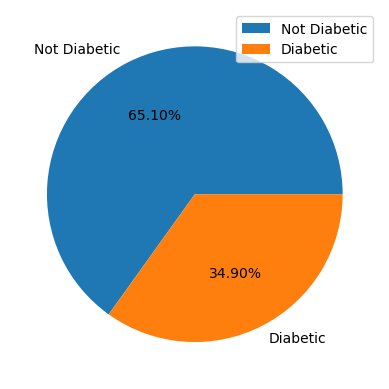

In [195]:
labels= 'Not Diabetic','Diabetic'
plt.pie(df['Outcome'].value_counts(),labels=labels,autopct='%0.02f%%')
plt.legend()
plt.show()